In [1]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

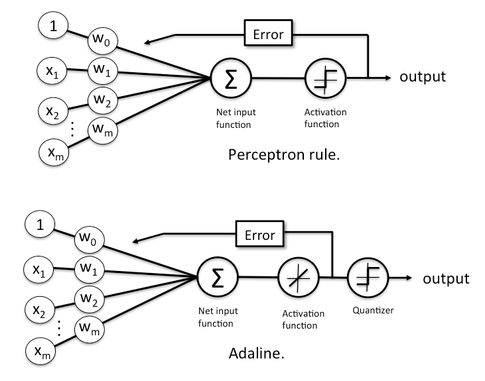

In [2]:
Image('adaline.png', height=200, width=400)

In [3]:
df = pd.read_table('https://raw.githubusercontent.com/nhduc279/deep-learning-notebooks/main/data/perceptron.txt', names=['X1', 'X2', 'target'])
df

,X1,X2,target
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-1.84,-1.13,0
...,...,...,...
95,0.71,2.27,1
96,1.96,0.83,1
97,2.52,1.83,1
98,2.77,2.82,1


In [4]:
X = df[['X1', 'X2']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [5]:
# convert numpy arrays to tensors
X_train = torch.tensor(X_train.values, dtype=torch.float)
X_test = torch.tensor(X_test.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)

In [6]:
cost = []
class Adaline():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(size=(num_features, 1), dtype=torch.float)
        self.bias = torch.zeros(size=(1,), dtype=torch.float)
        
    def forward(self, x):
        netinput = torch.add(torch.mm(x, self.weights), self.bias)
        return netinput.view(-1)
    
    def backward(self, x, yhat, y):
        
        # L = (yhat - y)^2
        grad_loss_yhat = 2*(yhat - y) # outer part of loss function
        grad_yhat_weight = x          # gradient of yhat with respect to weights
        grad_yhat_bias = 1            # gradient of yhat with respect to bias
        
        # inner * outer
        loss_grad_weights = torch.mm(grad_yhat_weight.t(), grad_loss_yhat.view(-1, 1)) / y.size(0)
        loss_grad_bias = torch.sum(grad_yhat_bias*grad_loss_yhat) / y.size(0)
        
        return (-1)* loss_grad_weights, (-1)*loss_grad_bias
    
    
    def loss(self, yhat, y):
        return torch.mean((yhat-y)**2)
    
    cost = []
    def train(self, x, y, num_epochs, learning_rate=0.01):
        for e in range(num_epochs):
            # compute netinput
            yhat = self.forward(x)
            
            # compute negative grad of loss function with respect to w and b
            negative_grad_w, negative_grad_b = self.backward(x, yhat, y)
            
            # update weights and bias
            self.weights += learning_rate*negative_grad_w
            self.bias += learning_rate*negative_grad_b
            
            # creat logging
            yhat = self.forward(x)
            curr_loss = self.loss(yhat, y)
            print('Epoch: %03d' % (e+1), end='')
            print('  |  MSE: %.3f' % curr_loss)
            cost.append(curr_loss)

    def evaluate(self, x_test, y_test):
        netinput = self.forward(x_test)
        y_pred = torch.where(netinput > 0.5, 1, 0)
        print(f'Predictions: {y_pred}')
        print(f'Accuracy: {torch.sum(y_pred==y_test) / y_test.size(0)*100}%')

In [7]:
adaline = Adaline(num_features= X_train.size(1))

In [8]:
adaline.train(X_train, y_train, num_epochs=40)

Epoch: 001  |  MSE: 0.408
Epoch: 002  |  MSE: 0.347
Epoch: 003  |  MSE: 0.303
Epoch: 004  |  MSE: 0.271
Epoch: 005  |  MSE: 0.247
Epoch: 006  |  MSE: 0.228
Epoch: 007  |  MSE: 0.213
Epoch: 008  |  MSE: 0.201
Epoch: 009  |  MSE: 0.191
Epoch: 010  |  MSE: 0.183
Epoch: 011  |  MSE: 0.175
Epoch: 012  |  MSE: 0.169
Epoch: 013  |  MSE: 0.163
Epoch: 014  |  MSE: 0.157
Epoch: 015  |  MSE: 0.152
Epoch: 016  |  MSE: 0.147
Epoch: 017  |  MSE: 0.142
Epoch: 018  |  MSE: 0.138
Epoch: 019  |  MSE: 0.134
Epoch: 020  |  MSE: 0.130
Epoch: 021  |  MSE: 0.126
Epoch: 022  |  MSE: 0.123
Epoch: 023  |  MSE: 0.119
Epoch: 024  |  MSE: 0.116
Epoch: 025  |  MSE: 0.113
Epoch: 026  |  MSE: 0.110
Epoch: 027  |  MSE: 0.107
Epoch: 028  |  MSE: 0.104
Epoch: 029  |  MSE: 0.102
Epoch: 030  |  MSE: 0.099
Epoch: 031  |  MSE: 0.097
Epoch: 032  |  MSE: 0.095
Epoch: 033  |  MSE: 0.092
Epoch: 034  |  MSE: 0.090
Epoch: 035  |  MSE: 0.088
Epoch: 036  |  MSE: 0.086
Epoch: 037  |  MSE: 0.084
Epoch: 038  |  MSE: 0.082
Epoch: 039  

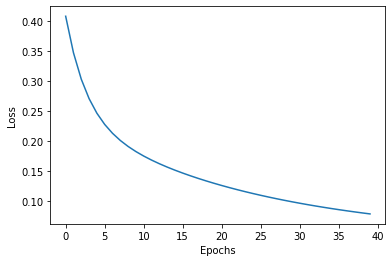

In [9]:
plt.plot(range(len(cost)), cost)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [10]:
adaline.evaluate(X_test, y_test)

Predictions: tensor([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1])
Accuracy: 96.0%
